PRELIM | EXAMINATION
--- | ---
Name: | **Leopando, Lara Jeneane D.G.**<br>
| **Feliciano, Kurt Martin**<br>
Course and Section: | **CPE 019 - CPE32S3**<br>
Date Performed: | **03-02-2024**<br>
Date Submitted: | **03-06-2024**<br>
Instructor: | **Engr. Roman Richard**<br>
<hr> | <hr>


#TASKS
1. Choose any dataset applicable for classification and/or prediction analysis problems.
2. Show the application of the following algorithms:
  - Linear Regression
    * Singular LR
    * Multiple LR
    * Polynomial LR
  - Logistic Regression
  - Decision Tree
  - Random Forest
3. Provide Evaluation reports for all models

##1. Choose any dataset applicable for classification and/or prediction analysis problems.

In [1]:
import pandas as pd

# Declaring the csv file to be used in this activity
# Source of csv file used : https://www.kaggle.com/code/rtatman/datasets-for-regression-analysis
csv_url = "https://raw.githubusercontent.com/izqnmi/CPE-019/main/csv%20files/weatherHistory.csv"
weatherDf = pd.read_csv(csv_url)

# Test if the declaration works
weatherDf.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [2]:
weatherDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


<ipython-input-3-a094269d1abb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weatherDf.corr())


<Axes: >

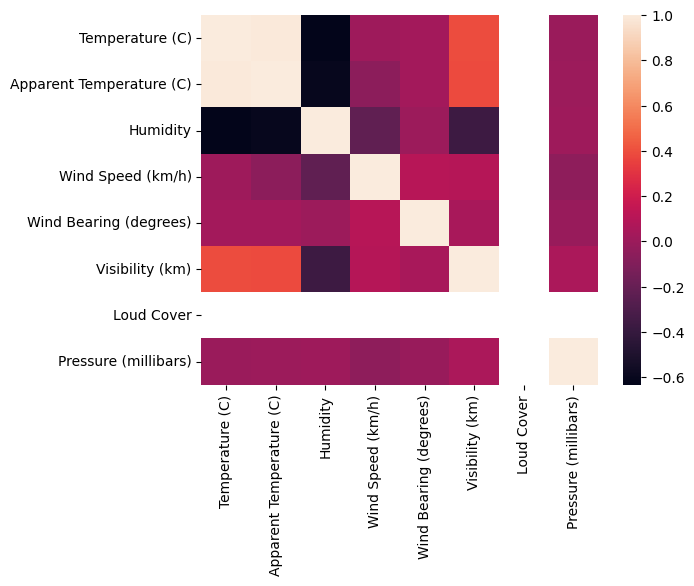

In [3]:
import seaborn as sns
sns.heatmap(weatherDf.corr())

###2. Show the application of the following algorithms:


### 2.1 Linear Regression

    * Singular LR


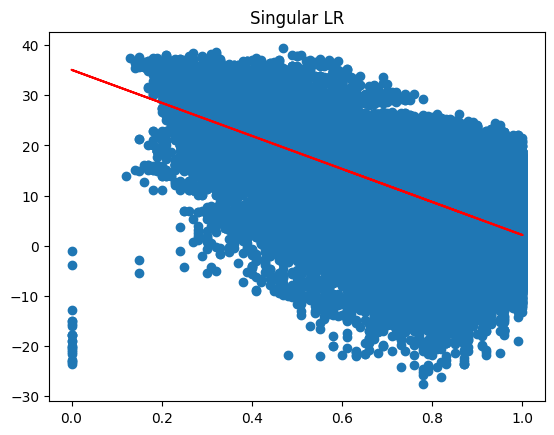

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Declare x and y values for LR
x = weatherDf["Humidity"].values.reshape(-1, 1)
y = weatherDf["Apparent Temperature (C)"].values.reshape(-1, 1)

# Perform Singular LR
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y)
plt.title("Singular LR")
plt.plot(x, y_pred, color = 'Red')
plt.show()

    * Multiple LR


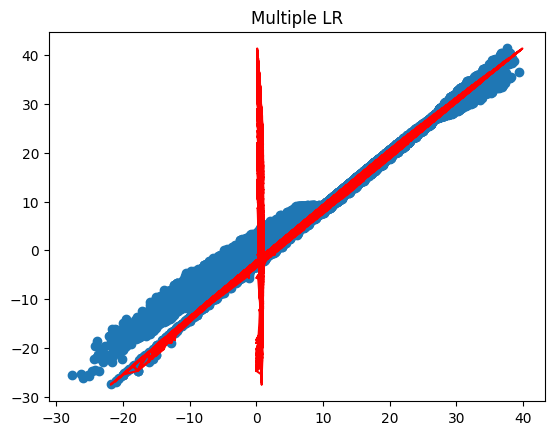

In [5]:
# Re-declare a new x value
xMultiple = weatherDf[["Humidity", "Temperature (C)"]]
yMultiple = weatherDf["Apparent Temperature (C)"]

# Perform Multiple LR
model.fit(xMultiple, yMultiple)
y_pred_multi = model.predict(xMultiple)
plt.title("Multiple LR")
plt.scatter(yMultiple, y_pred_multi)
plt.plot(xMultiple, y_pred_multi, color = 'Red')
plt.show()

    * Polynomial LR


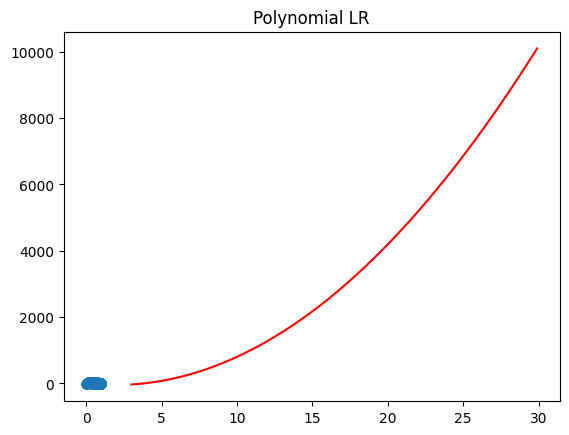

In [13]:
# Additional library for Poly LR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Variable declaration
x_train, x_test, y_train, y_test = train_test_split(weatherDf["Humidity"], weatherDf["Apparent Temperature (C)"])
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

# Declare the polynomial's degree
polydeg = PolynomialFeatures(degree = 2)
x_train_poly = polydeg.fit_transform(x_train_df)
x_test_poly = polydeg.fit_transform(x_test_df)

# Perform Poly LR
model.fit(x_train_poly, y_train)
coeff = model.coef_
intercept = model.intercept_
x_axis = np.arange(3, 30, 0.1)
resp = x_axis + coeff[1] * x_axis + coeff[2] * x_axis**2
plt.title("Polynomial LR")
plt.scatter(weatherDf["Humidity"], weatherDf["Apparent Temperature (C)"])
plt.plot(x_axis, resp, color = 'Red')
plt.show()

### 2.2 Logistic Regression


<Axes: title={'center': 'Logistic Regression'}, xlabel='Apparent Temperature (C)', ylabel='Humidity'>

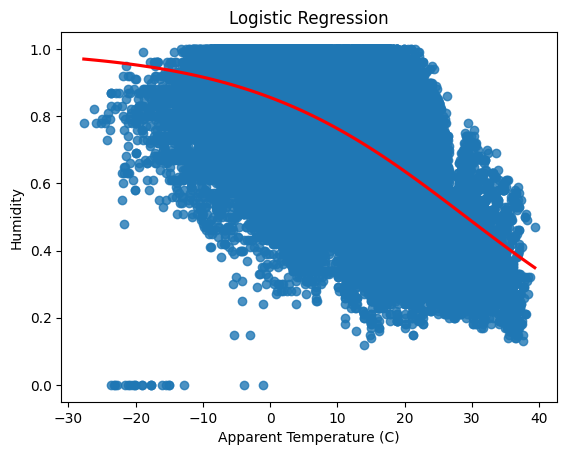

In [7]:
# Import seaborn as it can simplify the code
import seaborn as sns

# declare variables
x = weatherDf["Apparent Temperature (C)"]
y = weatherDf["Humidity"]

# name the graph
plt.title("Logistic Regression")
# seaborn syntax using the variables declared
sns.regplot(x=x, y=y, data=weatherDf, logistic=True, ci=None, line_kws={'color': 'red'})

### 2.3 Decision Tree


In [8]:
# Check for missing values
pd.isnull("weatherDf")

False

In [9]:
from sklearn import tree

# Set the parameters
y_target = weatherDf["Apparent Temperature (C)"].values
cols = ["Temperature (C)", "Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)"]
x_input = weatherDf[cols].values

# Configured Decision Tree method, due to float values instead of int (for entropy)
regress = tree.DecisionTreeRegressor(criterion="friedman_mse", max_depth=6)
regress.fit(x_input, y_target)
score = regress.score(x_input, y_target)

In [10]:
# Install graphviz
!pip install graphviz

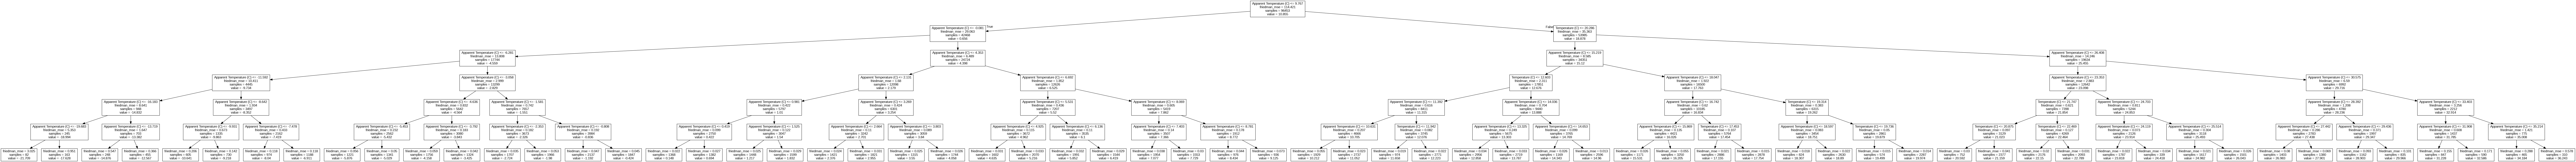

In [11]:
from six import StringIO
from IPython.display import Image

# Export as a dot file
with open("weather.dot", 'w') as f:
  f = tree.export_graphviz(regress, out_file=f, feature_names=cols)

# Convert the dot file to a png file, then display it
!dot -Tpng weather.dot -o weather.png
Image("weather.png")

### 2.4 Random Forest

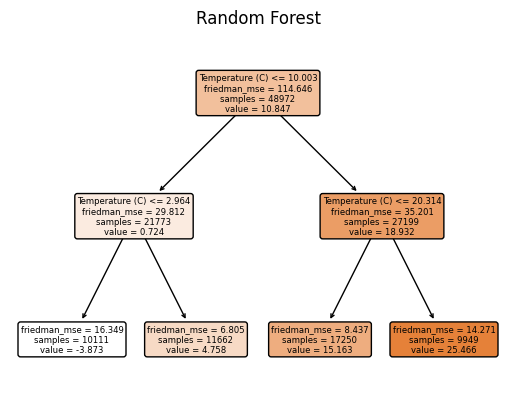

In [12]:
# import necessary libraries for random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# variable declaration
x = weatherDf[["Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)"]].values
y = weatherDf["Apparent Temperature (C)"].values

# classify the training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# regressor instead of classifier due to float values
clf = RandomForestRegressor(random_state=0, max_depth=2, n_estimators=100, criterion="friedman_mse")
clf.fit(x_train, y_train)
tree_to_plot = clf.estimators_[0]

# plot the decision tree
plot_tree(tree_to_plot, feature_names=["Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)"], filled=True, rounded=True)
plt.title("Random Forest")
plt.show()

##3. Provide Evaluation reports for all models

###3.1 Linear Regression
- Linear regression as a whole includes the representation of scatterplots and regression line, in line with your choice of database. Depending on the the dataset, the output may vary based on the computed mean squared error, r-squared, coefficients, etc. It is used to analyze such data, and allow us to determine the significance of the relationship between two or more variables.


  Singular LR
  - The code above declares two vairables "x" and "y", with the x-axis representing the "Humidity" and the y-axis representing the "Apparent Temperature", which is needed to create the scatter plot of the provided database. It then creates a red regression line above the scatter plot as shown in the output of Singular LR. The output represents the linear relationship between the two variables. Moreover, in singular linear regression, the output is created and illustrated by the computation of the mean squared error, or the R-squared. Overall, given that the plot is mostly scattered evenly, it then suggests that the regression type might be fit for the data we have used.


  Multiple LR
  - As the  code focuses on implementing multiple linear regression (MLR), it redefines the feature set xMultiple, comprising the two columns: "Humidity" and "Temperature (C)", indicating the model's utilization of both humidity and temperature as predictors for the target variable which is "Apparent Temperature (C)". Next, the model is fitted to this new feature set (xMultiple) along with the unchanged target variable (yMultiple). In addition, predictions are made (y_pred_multi) based on the input features (xMultiple). To assess the model's performance visually, a scatter plot is generated with the actual target variable (yMultiple) on the x-axis and the predicted values (y_pred_multi) on the y-axis, while the regression line, representing the model's predictions, is overlaid in red. Overall, the output above, illustrates how the predictions align with the actual values presented above.


  Polynomial LR
  - Given the code above, it is shown that the data from the weatherDF is splitted into training and testing, which is represented by x_train_poly and x_test_poly. The "Humidity" represents the feature, while the "Apparent Temperature (C)" represents the target variable. On the other hand, degree 2 is declared in line with the transformation of data to polynomial features, along with the computation of the coefficients and intercepts in getting the result. As shown above, while a polynomial regression curve is represented, there is not much plots seen and illustrated. Moreover, given the output, we believe that this kind of regression somehow is not fit for our provided data.


### 3.2 Logistic Regression
- The code imports Seaborn to visualize data effectively. It extracts "Apparent Temperature (C)" as the feature variable (x) and "Humidity" as the target variable (y) from the weatherDf DataFrame. Then, it creates a scatter plot with a logistic regression fit to explore the relationship between temperature and humidity. Since logistic regression is focused on probability, it  illustrates an output showing the positive and negative possible outcomes given the data from humidity and apparent temperature based on the weatherDF dataset.Moreover, as shown above, humidity is mostly present or consistent when the apparent temperature is around by the middle of being positive and negative.


###3.3 Decision Tree
- The decision tree is quire confusing, given that it has many branches to consider. The model's accuracy is then computed by the scores using the score method, wherein it computes the coefficient of the determination of the prediction of R^2.


### 3.4 Random Forest
- The the dataset is split into training and testing subsets, allocating 80% of the data for training and the remaining 20% for testing. To make it more simle to analyze, a decision tree from the forest is selcted and illsutrated above. The selected decision tree is plotted using the plot_tree function. Moreover, the random forest regression is a model wherein it generates a number of decision trees from the data used.

#SUMMARY:
- In summary, our examination allowed us to explore further on the different types of regression models we can use when analyzing and studying different kinds of data for classification and prediction. We have explored the essence and the purpose of using different models in determining the significance of the relationship between two or more variables or group of data. In addition, using the decision tree and the random forest, data can be illustrated, classified, and predicted easier. On the other hand, such metrics are also to be considered when using these models, scuh as mean squared error, R-squared, coefficients, and such. Overall, these models utilizes the use of statistics and probability in different types of data to be possibly provided or used.